In [1]:
import os 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../../src')
from Network.PatchHandler3D_temporal import PatchHandler4D_all_axis, PatchHandler4D_extended_data_augmentation

In [2]:
def load_indexes(index_file):
    """
        Load patch index file (csv). This is the file that is used to load the patches based on x,y,z index
    """
    indexes = np.genfromtxt(index_file, delimiter=',', skip_header=True, dtype='unicode') # 'unicode' or None
    return indexes

inexed csv shape: (686, 20) ['M6_2mm_step2_cs_invivoP03_lr_lessnoise.h5'
 'M6_2mm_step2_cs_invivoP03_hr.h5' '0' '2' '7' '5' '44' '1' '16' '16' '0'
 '0' '0' '1' '1' '1' 'u' 'v' 'w' '0.527']
Total dataset: 686 shuffle False
<PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None))>
(16, 16, 16) (32, 16, 16)
102.82235 22.28938
(16, 16, 16) (32, 16, 16)
13.509545 17.42165
------------1-----

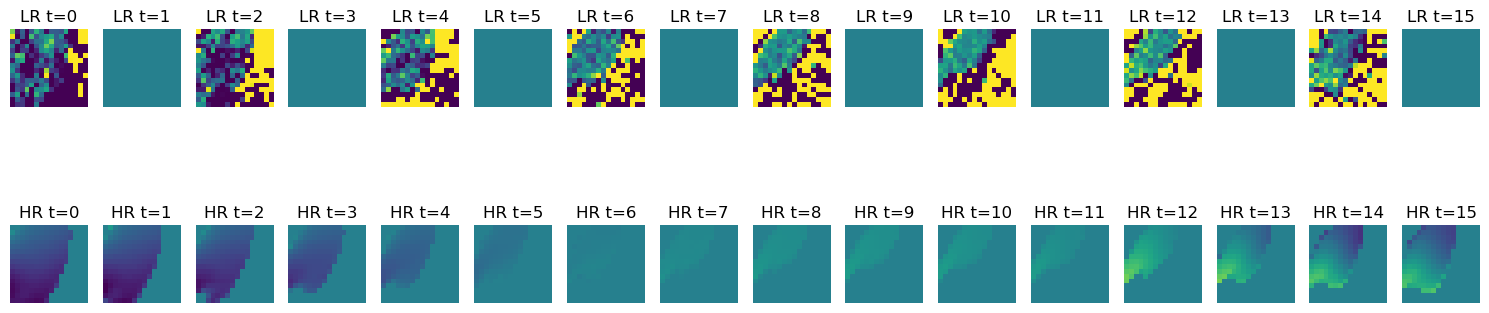

(16, 16, 16) (32, 16, 16)
-5.5245934 20.207169
------------2----------------


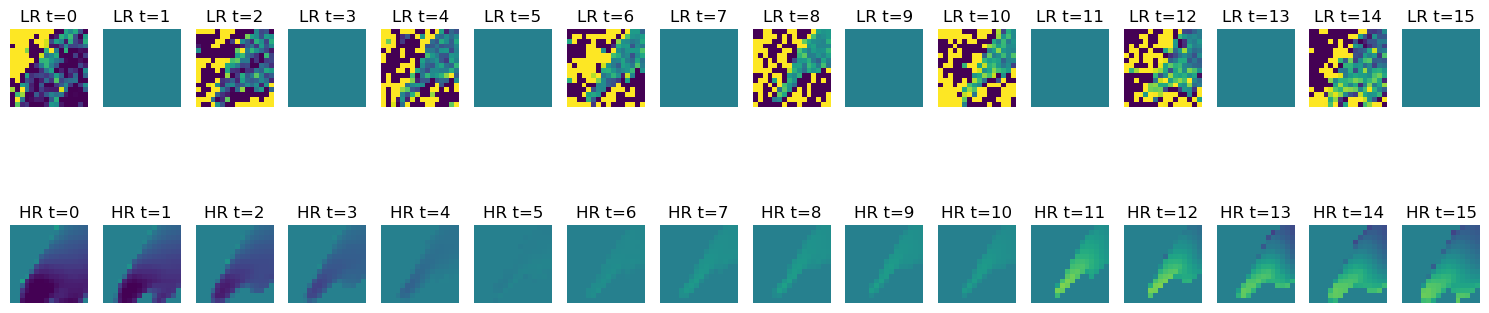

(16, 16, 16) (32, 16, 16)
10.529454 33.86079
------------3----------------


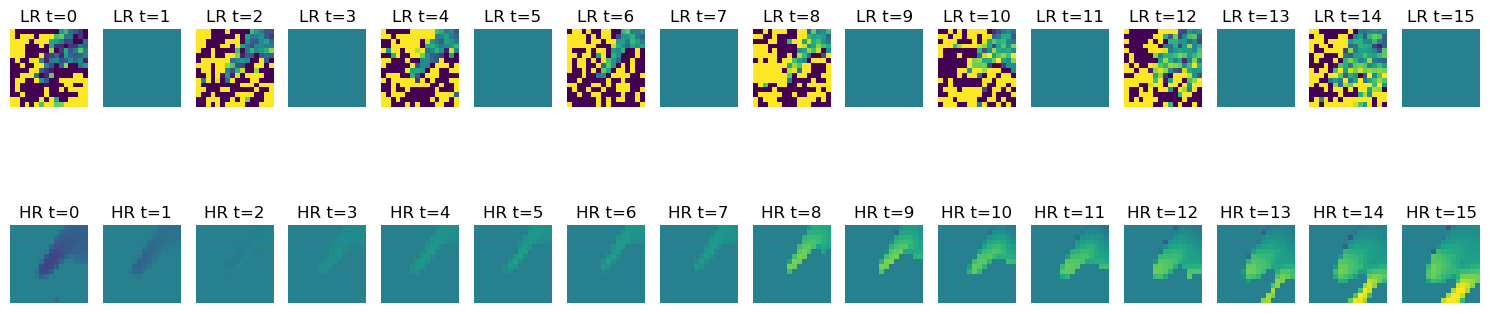

(16, 16, 16) (32, 16, 16)
34.761047 27.069708
------------4----------------


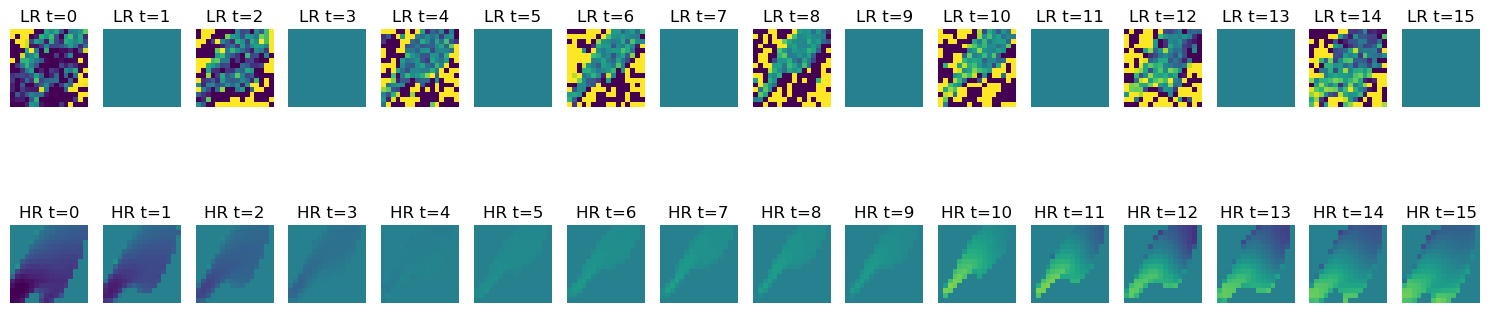

(16, 16, 16) (32, 16, 16)
37.146637 56.346397
------------5----------------


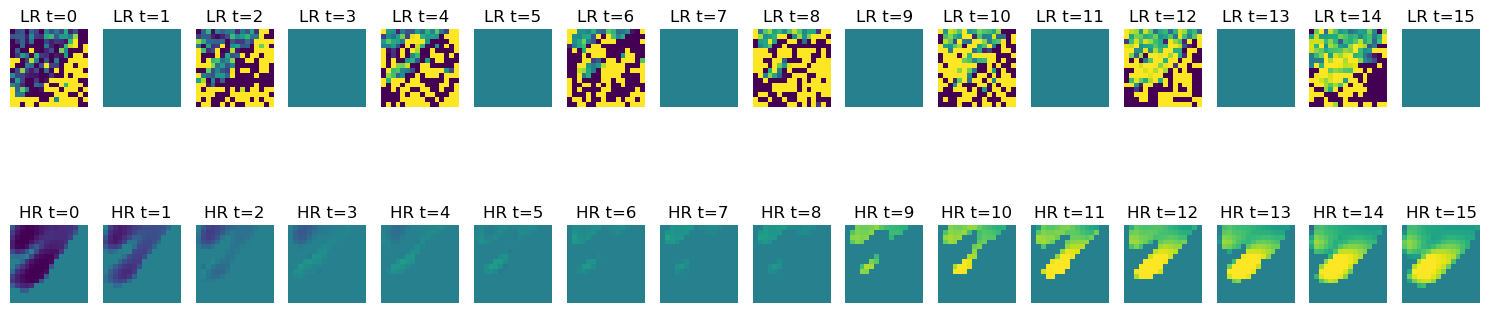

(16, 16, 16) (32, 16, 16)
4.2314897 21.031712
------------6----------------


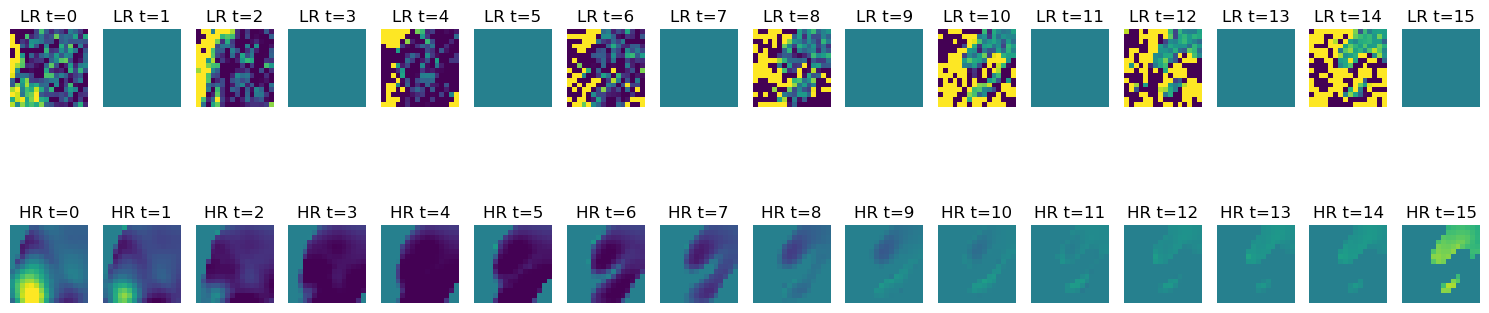

In [12]:
# Define csv_file
csv_file = "../../data/CARDIAC/csv_files/Temporal16MODEL6_2mm_step2_cs_invivomagn_exclfirst2frames_highcoverage_lessnoise.csv" #_lessnoise

data_dir = "../../data/CARDIAC"
patch_size = 16
res_increase = 2
batch_size = 1
mask_threshold = 0.5



assert os.path.exists(csv_file), f"Csv file not does exist: {csv_file}"
indexes_csv = load_indexes(csv_file)
print('inexed csv shape:', indexes_csv.shape, indexes_csv[0])
patch_handler = PatchHandler4D_extended_data_augmentation(data_dir, patch_size, res_increase, batch_size, mask_threshold)
testing_dataset = patch_handler.initialize_dataset(indexes_csv, shuffle=False, n_parallel=None)

print(testing_dataset)
for i, (data_pairs) in enumerate(testing_dataset):

    u,v,w, u_mag, v_mag, w_mag, u_hr,v_hr, w_hr, venc, mask = data_pairs
    u_lr = np.array(u).squeeze()
    v_lr = np.array(v).squeeze()
    w_lr = np.array(w).squeeze()

    u_hr = np.array(u_hr).squeeze()
    v_hr = np.array(v_hr).squeeze()
    w_hr = np.array(w_hr).squeeze()

    print(u_lr.shape, u_hr.shape)
    print(np.sum(u_lr), np.sum(u_hr))
    if i >= 1 and i < 12:
        print(f'------------{i}----------------')
        if i == 1:
            min_u = np.min(u_hr)
            max_u = np.max(u_hr)
            if max_u == 0 and min_u == 0:
                min_u = np.min(u_lr)
                max_u = np.max(u_lr)
        # Number of time points
        num_time_points = u_lr.shape[0]

        # Create a figure with subplots
        fig, axes = plt.subplots(2, num_time_points, figsize=(15, 5))

        # Plot each time point
        for t in range(num_time_points):
            # Plot low-resolution patch
            if t % 2 ==0:
                axes[0, t].imshow(u_lr[t//2, :, :], cmap='viridis', vmin=min_u, vmax=max_u)
            else:
                axes[0, t].imshow(np.zeros_like(u_lr[t, :, :]), cmap='viridis', vmin=min_u, vmax=max_u)
            axes[0, t].set_title(f'LR t={t}')
            axes[0, t].axis('off')
            
            # Plot high-resolution patch
            axes[1, t].imshow(u_hr[t, :, :], cmap='viridis', vmin=min_u, vmax=max_u)
            axes[1, t].set_title(f'HR t={t}')
            axes[1, t].axis('off')

        # Adjust layout
        plt.tight_layout()
        plt.show()
    if i>= 6:
        break


In [ ]:
import matplotlib.pyplot as plt

# Number of time points
num_time_points = u_lr.shape[0]
min_u = np.min(u_hr)
max_u = np.max(u_hr)

# Create a figure with subplots
fig, axes = plt.subplots(2, num_time_points, figsize=(15, 5))

# Plot each time point
for t in range(num_time_points):
    # Plot low-resolution patch
    if t % 2 ==0:
        axes[0, t].imshow(u_lr[t, :, :], cmap='viridis', vmin=min_u, vmax=max_u)
    else:
        axes[0, t].imshow(np.zeros_like(u_lr[t, :, :]), cmap='viridis', vmin=min_u, vmax=max_u)
    axes[0, t].set_title(f'LR t={t}')
    axes[0, t].axis('off')
    
    # Plot high-resolution patch
    axes[1, t].imshow(u_hr[t, :, :], cmap='viridis', vmin=min_u, vmax=max_u)
    axes[1, t].set_title(f'HR t={t}')
    axes[1, t].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

min_v = np.min(v_hr)
max_v = np.max(v_hr)

# Create a figure with subplots
fig, axes = plt.subplots(2, num_time_points, figsize=(15, 5))

# Plot each time point
for t in range(num_time_points):
    # Plot low-resolution patch
    if t % 2 ==0:
        axes[0, t].imshow(v_lr[t, :, :], cmap='viridis', vmin=min_v, vmax=max_v)
    else:
        axes[0, t].imshow(np.zeros_like(v_lr[t, :, :]), cmap='viridis', vmin=min_v, vmax=max_v)
    axes[0, t].set_title(f'LR t={t}')
    axes[0, t].axis('off')
    
    # Plot high-resolution patch
    axes[1, t].imshow(v_hr[t, :, :], cmap='viridis', vmin=min_v, vmax=max_v)
    axes[1, t].set_title(f'HR t={t}')
    axes[1, t].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

min_w = np.min(w_hr)
max_w = np.max(w_hr)

# Create a figure with subplots
fig, axes = plt.subplots(2, num_time_points, figsize=(15, 5))

# Plot each time point
for t in range(num_time_points):
    # Plot low-resolution patch
    if t % 2 ==0:
        axes[0, t].imshow(w_lr[t, :, :], cmap='viridis', vmin=min_w, vmax=max_w)
    else:
        axes[0, t].imshow(np.zeros_like(w_lr[t, :, :]), cmap='viridis', vmin=min_w, vmax=max_w)
    axes[0, t].set_title(f'LR t={t}')
    axes[0, t].axis('off')
    
    # Plot high-resolution patch
    axes[1, t].imshow(w_hr[t, :, :], cmap='viridis', vmin=min_w, vmax=max_w)
    axes[1, t].set_title(f'HR t={t}')
    axes[1, t].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# now display the images
print(u_lr.shape, u_hr.shape, w_lr.shape, w_hr.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(15, 15))
ax[0, 0].imshow(u_lr[0, :, :], cmap='gray')
ax[0, 0].set_title('u')
ax[0, 1].imshow(v_lr[0, :, :], cmap='gray')
ax[0, 1].set_title('v')
ax[0, 2].imshow(w_lr[0, :, :], cmap='gray')
ax[0, 2].set_title('w')
ax[1, 0].imshow(u_hr[0, :, :], cmap='gray')
ax[1, 0].set_title('u_hr')
ax[1, 1].imshow(v_hr[0, :, :], cmap='gray')
ax[1, 1].set_title('v_hr')
ax[1, 2].imshow(w_hr[0, :, :], cmap='gray')
ax[1, 2].set_title('w_hr')



In [ ]:
## Select the time point, for example t=0
time_point = 0
u_slice = u_hr[time_point, :, :]
v_slice = v_hr[time_point, :, :]

# Function to plot vector field
def plot_vector_field(u, v, title):
    plt.figure(figsize=(6, 6))
    X, Y = np.meshgrid(np.arange(u.shape[1]), np.arange(u.shape[0]))
    plt.quiver(X, Y, u, v)
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    plt.show()

# 1. Original vector field at time point 0
plot_vector_field(u_slice, v_slice, "Original Vector Field")

# 2. Flipped vector field (vertically)
plot_vector_field(np.flip(u_slice, axis=1), np.flip(v_slice, axis=1), "Flipped Vector Field (Vertically)")

# 2.1 Flipped vector field (horizontally)
plot_vector_field(np.flip(u_slice, axis=0), np.flip(v_slice, axis=0), "Flipped Vector Field (Horizontally)")

plot_vector_field(np.flip(np.flip(u_slice, axis=0), axis=1), np.flip(np.flip(v_slice, axis=0), axis=1), "Flipped Vector Field (Horizontally then Vertically)")

# 3. Change sign of the vector field
plot_vector_field(-u_slice, -v_slice, "Sign-changed Vector Field")

# 4. Both flip and change sign
plot_vector_field(-np.flip(u_slice, axis=1), -np.flip(v_slice, axis=1), "Flipped & Sign-changed Vector Field")

# 5. Rotate the vector field by 90 degrees
u_rotated = np.rot90(u_slice)
v_rotated = np.rot90(v_slice)
plot_vector_field(u_rotated, v_rotated, "Vector Field Rotated by 90 Degrees")

# 6. Swap u and v components (vector direction change)
plot_vector_field(v_slice, u_slice, "Vector Field with u and v Swapped")

# 7. Rotate by 90 degrees and swap u and v
plot_vector_field(np.rot90(v_slice), np.rot90(u_slice), "Rotated by 90 Degrees & u and v Swapped")

# rotate by 180 degrees
plot_vector_field(np.rot90(v_slice, k=2), np.rot90(u_slice, k=2), "Rotated by 180 Degrees")

plot_vector_field(np.flip(np.flip(v_slice, axis=0), axis=1), np.flip(np.flip(u_slice, axis=0), axis=1), "Swap U and V and Flipped Vector Field (Horizontally then Vertically)")